In [1]:
import pandas as pd
import numpy as np

# SPOTIFY WRAP

#### LOADING THE DATASET

In [2]:
df=pd.read_csv("Streaming_History_Audio_2024_2.csv")

##### VIEWING THE DATA

In [3]:

df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2024-01-28T07:30:34Z,d9pfk773rmxyaskdwlhxxzyy6,android,117606,IN,42.111.192.6,unknown,9:45,Prabh Singh,9:45,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1706426915,False
1,2024-01-28T07:34:18Z,d9pfk773rmxyaskdwlhxxzyy6,android,224146,IN,42.111.192.6,unknown,Pasoori,Shae Gill,Pasoori,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1706427033,False
2,2024-01-28T07:38:25Z,d9pfk773rmxyaskdwlhxxzyy6,android,246100,IN,42.111.192.6,unknown,Chittiyaan Kalaiyaan,Meet Bros Anjjan,Roy,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1706427258,False
3,2024-01-28T07:41:11Z,d9pfk773rmxyaskdwlhxxzyy6,android,164464,IN,42.111.192.6,unknown,Kala Chashma,Prem Hardeep,The Neha Kakkar Collection,...,NaN,NaN,NaN,trackdone,fwdbtn,False,True,False,1706427504,False
4,2024-01-28T07:53:25Z,d9pfk773rmxyaskdwlhxxzyy6,android,35029,IN,42.111.192.61,unknown,Cheques,Shubh,Still Rollin,...,NaN,NaN,NaN,fwdbtn,logout,False,False,False,1706427670,False


In [4]:
df.tail()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
7779,2024-07-25T14:39:40Z,d9pfk773rmxyaskdwlhxxzyy6,android,209156,IN,42.111.204.50,unknown,Say Yes To Heaven,Lana Del Rey,Say Yes To Heaven,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1721918170,False
7780,2024-07-25T14:43:28Z,d9pfk773rmxyaskdwlhxxzyy6,android,228639,IN,42.111.204.50,unknown,we can't be friends (wait for your love),Ariana Grande,eternal sunshine,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1721918380,False
7781,2024-07-25T14:46:41Z,d9pfk773rmxyaskdwlhxxzyy6,android,179586,IN,42.111.204.50,unknown,LUNCH,Billie Eilish,HIT ME HARD AND SOFT,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1721918609,False
7782,2024-07-25T14:50:11Z,d9pfk773rmxyaskdwlhxxzyy6,android,209386,IN,42.111.204.50,unknown,Out of My League,Fitz and The Tantrums,Out of My League,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1721918802,False
7783,2024-07-25T15:17:19Z,d9pfk773rmxyaskdwlhxxzyy6,android,127846,IN,42.111.208.4,unknown,Baby I'm Yours,Arctic Monkeys,Leave Before The Lights Come On,...,NaN,NaN,NaN,trackdone,logout,False,False,False,1721919012,False


##### details of dataset 

In [5]:
df.shape

(7784, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784 entries, 0 to 7783
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 7784 non-null   object 
 1   username                           7784 non-null   object 
 2   platform                           7784 non-null   object 
 3   ms_played                          7784 non-null   int64  
 4   conn_country                       7784 non-null   object 
 5   ip_addr_decrypted                  7784 non-null   object 
 6   user_agent_decrypted               7784 non-null   object 
 7   master_metadata_track_name         7611 non-null   object 
 8   master_metadata_album_artist_name  7611 non-null   object 
 9   master_metadata_album_album_name   7611 non-null   object 
 10  spotify_track_uri                  7611 non-null   object 
 11  episode_name                       0 non-null      float

In [7]:
def convert_milliseconds(ms):
    # Calculate days, hours, minutes, and seconds
    days = ms // (1000 * 60 * 60 * 24)
    ms %= (1000 * 60 * 60 * 24)
    
    hours = ms // (1000 * 60 * 60)
    ms %= (1000 * 60 * 60)
    
    minutes = ms // (1000 * 60)
    ms %= (1000 * 60)
    
    seconds = ms // 1000
    
    return days, hours, minutes, seconds

df['formatted_time'] = df['ms_played'].apply(convert_milliseconds)

In [8]:
df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,formatted_time
0,2024-01-28T07:30:34Z,d9pfk773rmxyaskdwlhxxzyy6,android,117606,IN,42.111.192.6,unknown,9:45,Prabh Singh,9:45,...,NaN,NaN,trackdone,trackdone,False,False,False,1706426915,False,"(0, 0, 1, 57)"
1,2024-01-28T07:34:18Z,d9pfk773rmxyaskdwlhxxzyy6,android,224146,IN,42.111.192.6,unknown,Pasoori,Shae Gill,Pasoori,...,NaN,NaN,trackdone,trackdone,False,False,False,1706427033,False,"(0, 0, 3, 44)"
2,2024-01-28T07:38:25Z,d9pfk773rmxyaskdwlhxxzyy6,android,246100,IN,42.111.192.6,unknown,Chittiyaan Kalaiyaan,Meet Bros Anjjan,Roy,...,NaN,NaN,trackdone,trackdone,False,False,False,1706427258,False,"(0, 0, 4, 6)"
3,2024-01-28T07:41:11Z,d9pfk773rmxyaskdwlhxxzyy6,android,164464,IN,42.111.192.6,unknown,Kala Chashma,Prem Hardeep,The Neha Kakkar Collection,...,NaN,NaN,trackdone,fwdbtn,False,True,False,1706427504,False,"(0, 0, 2, 44)"
4,2024-01-28T07:53:25Z,d9pfk773rmxyaskdwlhxxzyy6,android,35029,IN,42.111.192.61,unknown,Cheques,Shubh,Still Rollin,...,NaN,NaN,fwdbtn,logout,False,False,False,1706427670,False,"(0, 0, 0, 35)"


In [9]:
df.isnull().sum()

ts                                      0
username                                0
platform                                0
ms_played                               0
conn_country                            0
ip_addr_decrypted                       0
user_agent_decrypted                    0
master_metadata_track_name            173
master_metadata_album_artist_name     173
master_metadata_album_album_name      173
spotify_track_uri                     173
episode_name                         7784
episode_show_name                    7784
spotify_episode_uri                  7784
reason_start                            0
reason_end                              0
shuffle                                 0
skipped                                 0
offline                                 0
offline_timestamp                       0
incognito_mode                          0
formatted_time                          0
dtype: int64

### DROP THE UNWANTED COLUMNS 

In [10]:
new_df=df.drop(["ts","username","platform","user_agent_decrypted","conn_country","ip_addr_decrypted","spotify_track_uri","episode_name","episode_show_name","spotify_episode_uri","incognito_mode","reason_start","reason_end","offline_timestamp"],axis=1)

In [11]:
new_df.head()

,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,shuffle,skipped,offline,formatted_time
0,117606,9:45,Prabh Singh,9:45,False,False,False,"(0, 0, 1, 57)"
1,224146,Pasoori,Shae Gill,Pasoori,False,False,False,"(0, 0, 3, 44)"
2,246100,Chittiyaan Kalaiyaan,Meet Bros Anjjan,Roy,False,False,False,"(0, 0, 4, 6)"
3,164464,Kala Chashma,Prem Hardeep,The Neha Kakkar Collection,False,True,False,"(0, 0, 2, 44)"
4,35029,Cheques,Shubh,Still Rollin,False,False,False,"(0, 0, 0, 35)"


In [12]:
new_df.describe()

,ms_played
count,7784.000000
mean,156182.364594
std,101551.982963
min,0.000000
25%,70791.250000
50%,176261.000000
75%,226986.000000
max,750625.000000


In [13]:
print(new_df.isnull().sum())


ms_played                              0
master_metadata_track_name           173
master_metadata_album_artist_name    173
master_metadata_album_album_name     173
shuffle                                0
skipped                                0
offline                                0
formatted_time                         0
dtype: int64


In [14]:
new_df

,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,shuffle,skipped,offline,formatted_time
0,117606,9:45,Prabh Singh,9:45,False,False,False,"(0, 0, 1, 57)"
1,224146,Pasoori,Shae Gill,Pasoori,False,False,False,"(0, 0, 3, 44)"
2,246100,Chittiyaan Kalaiyaan,Meet Bros Anjjan,Roy,False,False,False,"(0, 0, 4, 6)"
3,164464,Kala Chashma,Prem Hardeep,The Neha Kakkar Collection,False,True,False,"(0, 0, 2, 44)"
4,35029,Cheques,Shubh,Still Rollin,False,False,False,"(0, 0, 0, 35)"
...,...,...,...,...,...,...,...,...
7779,209156,Say Yes To Heaven,Lana Del Rey,Say Yes To Heaven,False,False,False,"(0, 0, 3, 29)"
7780,228639,we can't be friends (wait for your love),Ariana Grande,eternal sunshine,False,False,False,"(0, 0, 3, 48)"
7781,179586,LUNCH,Billie Eilish,HIT ME HARD AND SOFT,False,False,False,"(0, 0, 2, 59)"
7782,209386,Out of My League,Fitz and The Tantrums,Out of My League,False,False,False,"(0, 0, 3, 29)"


### GROUP BY TRACK NAME

In [15]:
grouped_data=new_df.groupby("master_metadata_track_name").sum()
grouped_data

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\4147714440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data=new_df.groupby("master_metadata_track_name").sum()


,ms_played,shuffle,skipped,offline
master_metadata_track_name,,,,
"""Slut!"" (Taylor's Version) (From The Vault)",3143236,8,4,0
...Ready For It?,832744,4,0,0
10/10,1150851,8,1,0
100 words,631260,2,0,0
12 Hours,139846,0,1,0
...,...,...,...,...
why u gotta be like that (feat. Nightly),1467,0,1,0
willow,215059,2,0,0
wtf,72187,0,0,0


### SORTING BY TIME PLAYED

In [16]:
sorted_df=grouped_data.sort_values(by="ms_played",ascending=False).reset_index()

In [17]:
top_10=sorted_df.head(10)
top_10

,master_metadata_track_name,ms_played,shuffle,skipped,offline
0,Unwritten,18813978,7,19,0
1,Espresso,18190877,41,25,0
2,The Less I Know The Better,11476594,25,9,0
3,Yellow,11101834,10,10,0
4,Paradise,9595549,7,5,0
5,About You,9575908,2,5,0
6,DONTTRUSTME,9466252,10,6,0
7,BIRDS OF A FEATHER,9376306,7,5,0
8,Chemtrails Over The Country Club,8660975,10,16,0
9,"One Of The Girls (with JENNIE, Lily Rose Depp)",8067183,15,5,0


## TOTAL MINUTES PLAYED

In [18]:

total_ms_played=df["ms_played"].sum()
#print(total_ms_played)
days, hours, minutes, seconds = convert_milliseconds(total_ms_played)
print(f"{days} days, {hours} hours, {minutes} minutes, {seconds} seconds")

14 days, 1 hours, 42 minutes, 3 seconds


## TOP 10 MOST PLAYED SONGS

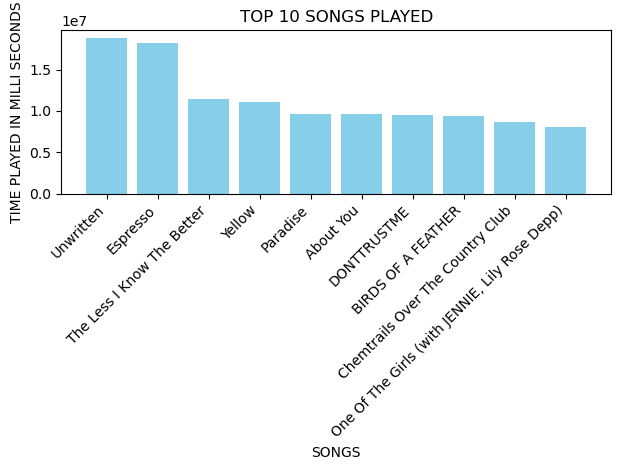

In [19]:
import matplotlib.pyplot as plt
top_10=sorted_df.head(10)
plt.bar(top_10['master_metadata_track_name'],top_10["ms_played"],color='skyblue')
plt.title("TOP 10 SONGS PLAYED")
plt.xlabel('SONGS')
plt.ylabel('TIME PLAYED IN MILLI SECONDS')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

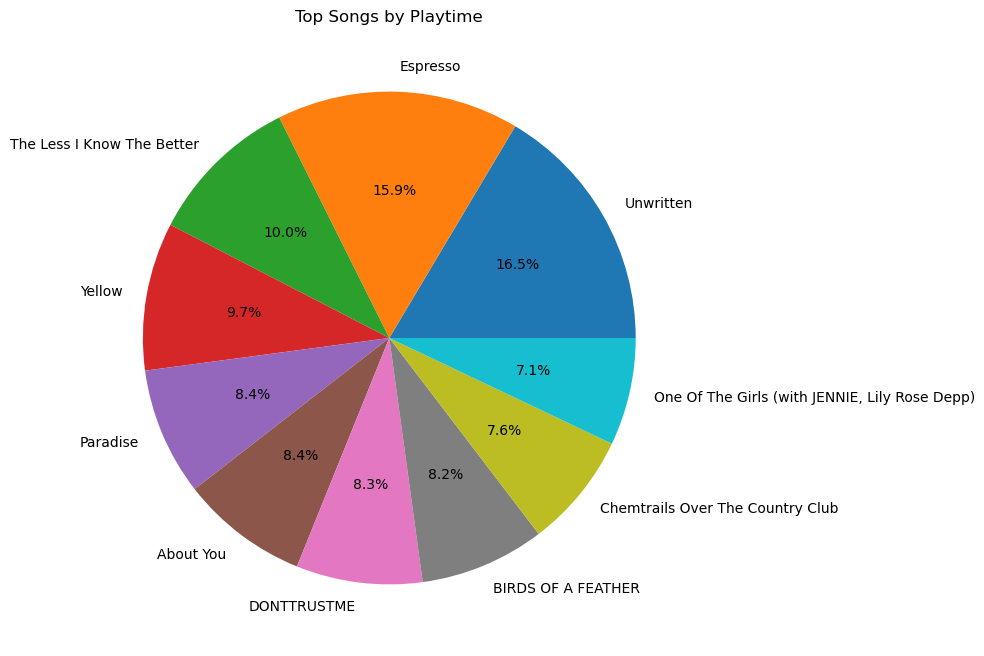

In [20]:
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(top_10['ms_played'], labels=top_10['master_metadata_track_name'], autopct='%1.1f%%')

# Adding a title
plt.title('Top Songs by Playtime')

# Displaying the chart
plt.show()

In [21]:
grouped_data_artist=new_df.groupby("master_metadata_album_artist_name").sum()
grouped_data_artist

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\3152433245.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_artist=new_df.groupby("master_metadata_album_artist_name").sum()


,ms_played,shuffle,skipped,offline
master_metadata_album_artist_name,,,,
100 gecs,243362,2,0,0
3OH!3,9466252,10,6,0
5 Seconds of Summer,839448,3,1,0
A Boogie Wit da Hoodie,3330,0,2,0
A$AP Rocky,2334588,4,12,0
...,...,...,...,...
omer inayat,600,2,2,0
sadhoband,107762,0,0,0
vaultboy,308164,1,2,0


In [22]:
sorted_df_artist=grouped_data_artist.sort_values(by="ms_played",ascending=False).reset_index()

In [23]:
top_10_artist=sorted_df_artist.head(10)
top_10_artist

,master_metadata_album_artist_name,ms_played,shuffle,skipped,offline
0,The Weeknd,121286609,338,130,1
1,Taylor Swift,115403298,479,156,2
2,Lana Del Rey,80881164,216,92,0
3,Rex Orange County,62152408,217,53,0
4,Billie Eilish,46411444,88,39,0
5,Sabrina Carpenter,34290834,45,42,0
6,Pritam,32829143,120,77,0
7,Twenty One Pilots,29080330,122,48,0
8,Doja Cat,21862667,49,43,0
9,Ariana Grande,20497796,35,51,0


## TOP 10 MOST PLAYED ARTISTS

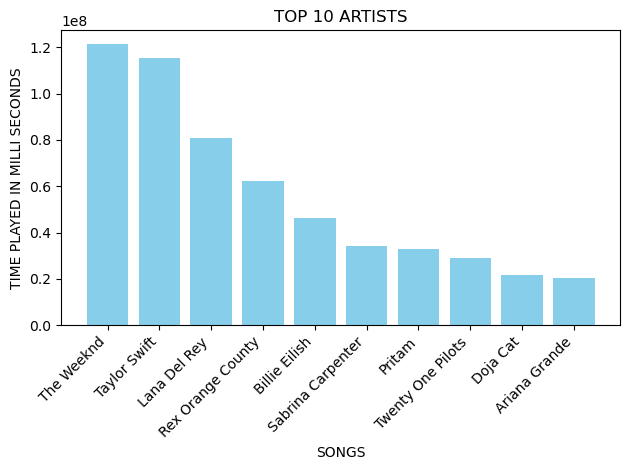

In [24]:
import matplotlib.pyplot as plt
top_10=sorted_df.head(10)
plt.bar(top_10_artist['master_metadata_album_artist_name'],top_10_artist["ms_played"],color='skyblue')
plt.title("TOP 10 ARTISTS")
plt.xlabel('SONGS')
plt.ylabel('TIME PLAYED IN MILLI SECONDS')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

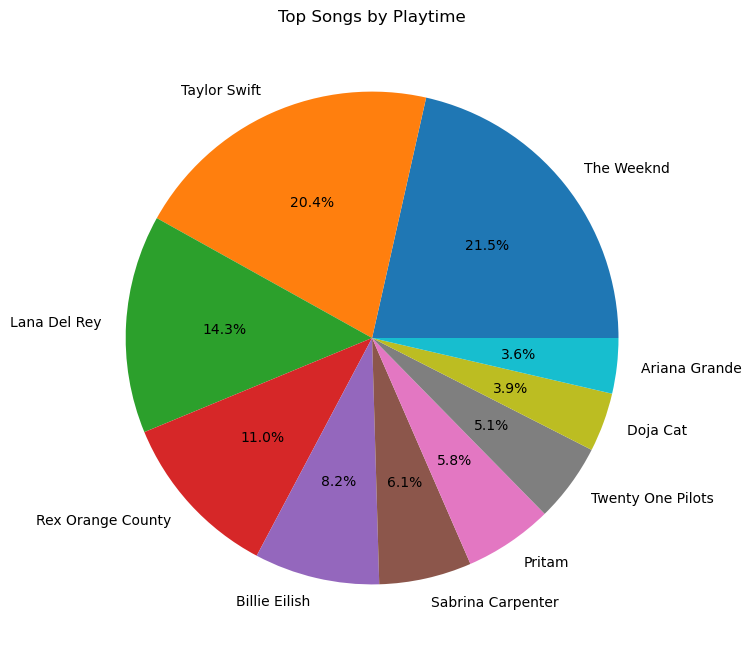

In [25]:
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(top_10_artist['ms_played'], labels=top_10_artist['master_metadata_album_artist_name'], autopct='%1.1f%%')

# Adding a title
plt.title('Top Songs by Playtime')

# Displaying the chart
plt.show()

In [26]:
grouped_data_album=new_df.groupby("master_metadata_album_album_name").sum()
grouped_data_album

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\276848008.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_album=new_df.groupby("master_metadata_album_album_name").sum()


,ms_played,shuffle,skipped,offline
master_metadata_album_album_name,,,,
10/10,438306,2,0,0
1000 gecs,243362,2,0,0
14 minutes,796916,0,1,0
17,107733,0,2,0
18 Months,2676920,8,1,0
...,...,...,...,...
why u gotta be like that (feat. Nightly),1467,0,1,0
x,777352,4,1,0
"yes, and?",1366937,2,3,0


In [27]:
sorted_df_album=grouped_data_album.sort_values(by="ms_played",ascending=False).reset_index()

In [28]:
top_10_album=sorted_df_album.head(10)
top_10_album

,master_metadata_album_album_name,ms_played,shuffle,skipped,offline
0,HIT ME HARD AND SOFT,42319465,85,35,0
1,"My Dear Melancholy,",21575700,35,13,0
2,Starboy,21431743,82,26,0
3,Unwritten,18813978,7,19,0
4,Espresso,18190877,41,25,0
5,After Hours,16969776,51,17,1
6,Born To Die - The Paradise Edition,16910453,42,21,0
7,Blurryface,14840379,59,16,0
8,Beauty Behind The Madness,13982844,38,20,0
9,Bcos U Will Never B Free,13244918,31,7,0


## TOP 10 MOST PLAYED ALBUMS

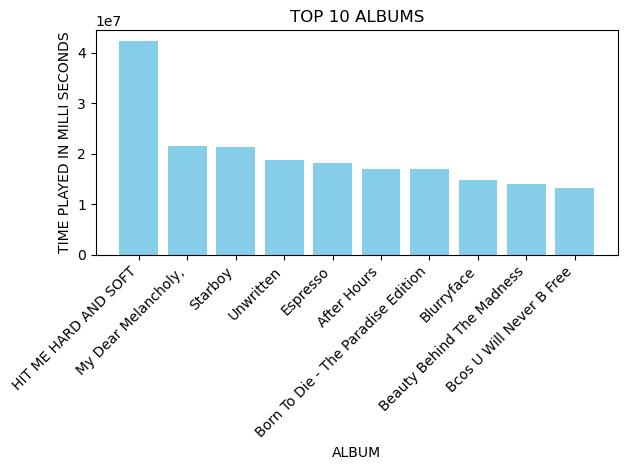

In [29]:
import matplotlib.pyplot as plt

plt.bar(top_10_album['master_metadata_album_album_name'],top_10_album["ms_played"],color='skyblue')
plt.title("TOP 10 ALBUMS")
plt.xlabel('ALBUM')
plt.ylabel('TIME PLAYED IN MILLI SECONDS')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

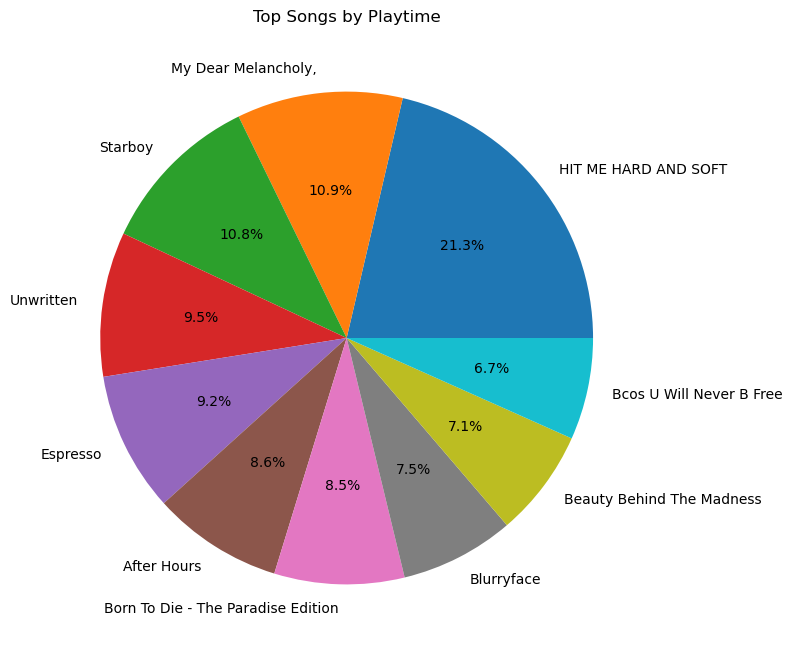

In [30]:
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(top_10_album['ms_played'], labels=top_10_album['master_metadata_album_album_name'], autopct='%1.1f%%')

# Adding a title
plt.title('Top Songs by Playtime')

# Displaying the chart
plt.show()

## PEAK LISTENING MONTH

In [31]:
df['ts'] = pd.to_datetime(df['ts'])

# Group by year and month
df_grouped = df.groupby(df['ts'].dt.to_period('M')).sum()

sorted_df_month=df_grouped.sort_values(by="ms_played",ascending=False).reset_index()



top_1=sorted_df_month[["ts","ms_played"]].head(1)
top_month = top_1["ts"].iloc[0]  # Extract the top month value
total_time = top_1["ms_played"].iloc[0]  # Extract the total time value

print(f"Top Month: {top_month}")
days, hours, minutes, seconds = convert_milliseconds(total_time)
print(f"Total Time Played: {days} days, {hours} hours, {minutes} minutes, {seconds} seconds")


Top Month: 2024-02
Total Time Played: 3 days, 13 hours, 18 minutes, 7 seconds


C:\Users\HP\AppData\Local\Temp\ipykernel_19416\2432977064.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_grouped = df.groupby(df['ts'].dt.to_period('M')).sum()
C:\Users\HP\AppData\Local\Temp\ipykernel_19416\2432977064.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(df['ts'].dt.to_period('M')).sum()
